# Welcome to My Jupyter Notebook Post! 📊

This notebook demonstrates how to create blog posts using Jupyter notebooks in Jekyll. We'll explore some basic data analysis and visualization techniques.

## Why Use Jupyter Notebooks for Blog Posts?

- **Interactive code**: Show your analysis step by step
- **Rich output**: Include plots, tables, and formatted text seamlessly
- **Reproducible**: Readers can download and run the same analysis
- **Educational**: Perfect for tutorials and data science content


## Setting Up Our Environment

Let's start by importing the libraries we'll need:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better-looking plots
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully! 🎉")


Libraries imported successfully! 🎉


## Generating Sample Data

Let's create some synthetic data to analyze. We'll simulate a dataset of student performance:


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic student data
n_students = 200

# Student characteristics
study_hours = np.random.normal(5, 2, n_students)
study_hours = np.clip(study_hours, 0, 10)  # Keep between 0-10 hours

sleep_hours = np.random.normal(7, 1.5, n_students)
sleep_hours = np.clip(sleep_hours, 4, 10)  # Keep between 4-10 hours

# Exam scores (influenced by study and sleep)
base_score = 50
study_effect = study_hours * 4  # Each hour of study adds ~4 points
sleep_effect = (sleep_hours - 6) * 2  # Optimal sleep around 7-8 hours
random_noise = np.random.normal(0, 10, n_students)

exam_scores = base_score + study_effect + sleep_effect + random_noise
exam_scores = np.clip(exam_scores, 0, 100)  # Keep between 0-100

# Create DataFrame
df = pd.DataFrame({
    'study_hours': study_hours,
    'sleep_hours': sleep_hours,
    'exam_score': exam_scores
})

# Add categorical variables
df['study_group'] = pd.cut(df['study_hours'], 
                          bins=[0, 3, 6, 10], 
                          labels=['Low', 'Medium', 'High'])

print(f"Generated data for {n_students} students")
print("\nFirst 5 rows:")
df.head()


Generated data for 200 students

First 5 rows:


,study_hours,sleep_hours,exam_score,study_group
0,5.993428,7.536681,61.102799,Medium
1,4.723471,7.841177,66.582489,Medium
2,6.295377,8.624577,80.483099,High
3,8.046060,8.580703,87.815451,High
4,4.531693,4.933496,61.493110,Medium


## Data Visualization

Now let's create some visualizations to better understand our data:


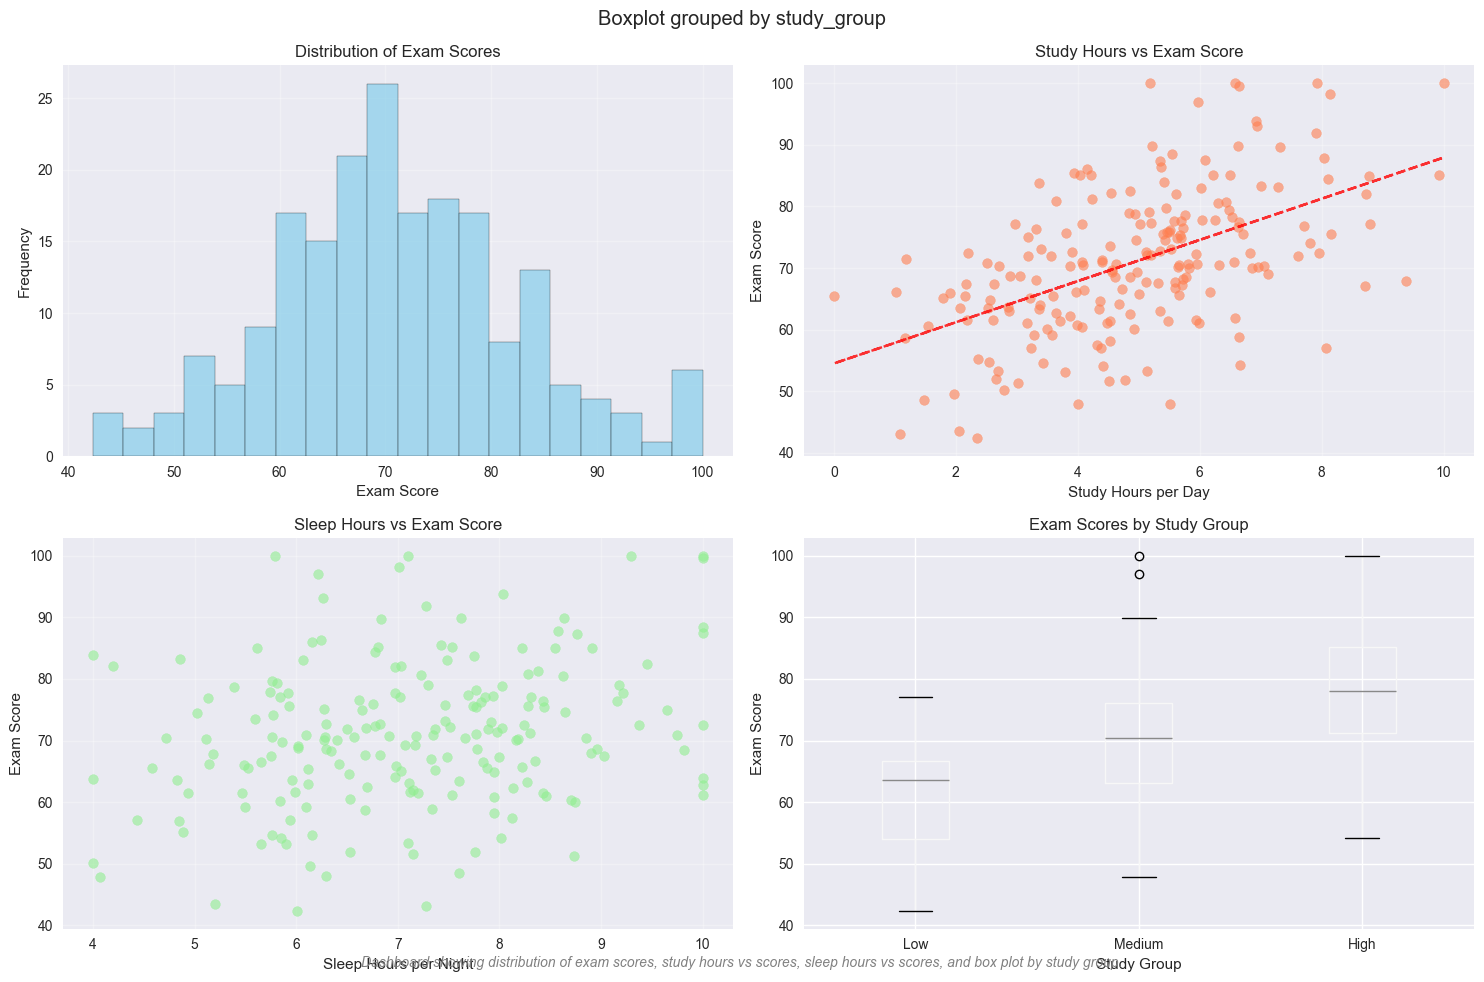

In [3]:
# Create a subplot with multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Student Performance Analysis Dashboard', fontsize=16, fontweight='bold')

# Add alt text description for accessibility
fig.text(0.5, 0.02, 'Dashboard showing distribution of exam scores, study hours vs scores, sleep hours vs scores, and box plot by study group.', 
         ha='center', va='bottom', fontsize=10, style='italic', color='gray')

# 1. Distribution of exam scores
axes[0, 0].hist(df['exam_score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Exam Scores')
axes[0, 0].set_xlabel('Exam Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Study hours vs exam scores
axes[0, 1].scatter(df['study_hours'], df['exam_score'], alpha=0.6, color='coral')
axes[0, 1].set_title('Study Hours vs Exam Score')
axes[0, 1].set_xlabel('Study Hours per Day')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['study_hours'], df['exam_score'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['study_hours'], p(df['study_hours']), "r--", alpha=0.8)

# 3. Sleep hours vs exam scores
axes[1, 0].scatter(df['sleep_hours'], df['exam_score'], alpha=0.6, color='lightgreen')
axes[1, 0].set_title('Sleep Hours vs Exam Score')
axes[1, 0].set_xlabel('Sleep Hours per Night')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plot by study group
df.boxplot(column='exam_score', by='study_group', ax=axes[1, 1])
axes[1, 1].set_title('Exam Scores by Study Group')
axes[1, 1].set_xlabel('Study Group')
axes[1, 1].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()


## Statistical Analysis

Let's perform some basic statistical analysis to quantify the relationships:


In [4]:
# Correlation analysis
correlations = df[['study_hours', 'sleep_hours', 'exam_score']].corr()

print("Correlation Matrix:")
print("=" * 30)
print(correlations.round(3))

# Statistical significance tests
study_corr, study_p = stats.pearsonr(df['study_hours'], df['exam_score'])
sleep_corr, sleep_p = stats.pearsonr(df['sleep_hours'], df['exam_score'])

print(f"\nStudy Hours vs Exam Score:")
print(f"Correlation: {study_corr:.3f}")
print(f"P-value: {study_p:.3e}")
print(f"Significant: {'Yes' if study_p < 0.05 else 'No'}")

print(f"\nSleep Hours vs Exam Score:")
print(f"Correlation: {sleep_corr:.3f}")
print(f"P-value: {sleep_p:.3e}")
print(f"Significant: {'Yes' if sleep_p < 0.05 else 'No'}")

# Group means
print("\nMean scores by study group:")
group_means = df.groupby('study_group')['exam_score'].mean()
for group, mean in group_means.items():
    print(f"{group}: {mean:.2f}")


Correlation Matrix:
             study_hours  sleep_hours  exam_score
study_hours        1.000        0.086       0.530
sleep_hours        0.086        1.000       0.241
exam_score         0.530        0.241       1.000

Study Hours vs Exam Score:
Correlation: 0.530
P-value: 7.133e-16
Significant: Yes

Sleep Hours vs Exam Score:
Correlation: 0.241
P-value: 5.887e-04
Significant: Yes

Mean scores by study group:
Low: 60.71
Medium: 70.14
High: 79.32


/var/folders/gs/q6cb20s96xl8zvw1zgbf79hc0000gn/T/ipykernel_91042/2854518275.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby('study_group')['exam_score'].mean()
